In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [2]:
train= pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv', sep='\t')
test= pd.read_csv('drugsCom_raw/drugsComTest_raw.tsv', sep='\t')


In [3]:
print("train: \n",train.describe().head(3)),
print("test:\n ",test.describe().head(3))
#train, test['condition'] has null values

train: 
           Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
test:
            Unnamed: 0        rating   usefulCount
count   53766.000000  53766.000000  53766.000000
mean   116386.701187      6.976900     27.989752
std     67017.739881      3.285207     36.172833


In [4]:
dtrain=train.dropna()
dtest=test.dropna()
print("train data after removing null: \n",dtrain.describe().head(3)),
print("test data after removing null:\n ",dtest.describe().head(3))

train data after removing null: 
           Unnamed: 0         rating    usefulCount
count  160398.000000  160398.000000  160398.000000
mean   115957.147309       6.995923      28.097613
std     67015.899492       3.272303      36.457876
test data after removing null:
            Unnamed: 0        rating   usefulCount
count   53471.000000  53471.000000  53471.000000
mean   116436.223617      6.976829     28.083634
std     67018.466874      3.286228     36.231706


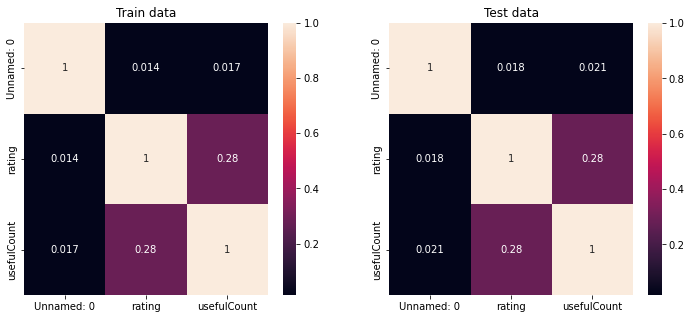

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig1=sns.heatmap(dtrain.corr(method='spearman'), annot=True, ax=ax[0])
ax[0].set_title('Train data')

fig2=sns.heatmap(dtest.corr(method='spearman'), annot=True, ax=ax[1])
ax[1].set_title('Test data')
# column 'Unnamed: 0' has only relation with drugname

dtrain, dtest=dtrain.drop(labels=['Unnamed: 0','date'] , axis=1), dtest.drop(labels=['Unnamed: 0','date']  , axis=1)

In [6]:
dtrain=dtrain.sample(weights='usefulCount',n=40001, ignore_index = True, random_state=101)
dtest=dtest.sample(n=13355, ignore_index = True, random_state=101)

Text(0.5, 1.0, 'Test data')

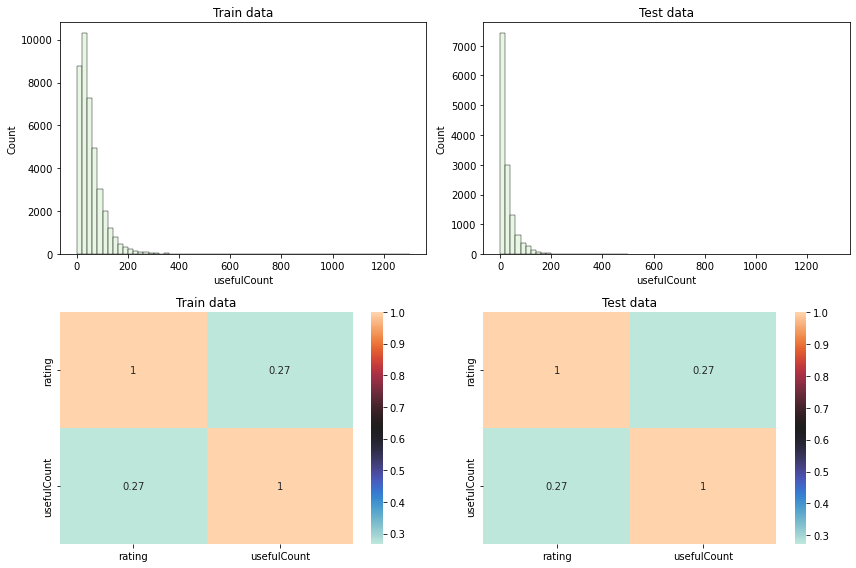

In [7]:
fig, (ax1,ax2) = plt.subplots(2, 2, figsize=(12,8), tight_layout='tight', sharex='row')
sns.set_palette(sns.color_palette("Greens"))

ax1[0]=sns.histplot(dtrain['usefulCount'], binwidth=20, legend=True, ax=ax1[0], palette= 'icefire' )
ax1[1]=sns.histplot(dtest['usefulCount'], binwidth=20, legend=True,  ax=ax1[1], palette= 'icefire')


ax2[0]=sns.heatmap(dtrain.corr(method='spearman'), annot=True, ax=ax2[0], cmap= 'icefire')
ax2[1]=sns.heatmap(dtest.corr(method='spearman'), annot=True, ax=ax2[1], cmap= 'icefire')

ax1[0].set_title('Train data')
ax1[1].set_title('Test data')
ax2[0].set_title('Train data')
ax2[1].set_title('Test data')


In [8]:
print("train data after sampling : \n",dtrain.describe().head(2)),
print("test data after sampling:\n ",dtest.describe().head(2))

train data after sampling : 
             rating   usefulCount
count  40001.00000  40001.000000
mean       7.79978     56.855829
test data after sampling:
               rating   usefulCount
count  13355.000000  13355.000000
mean       6.983677     27.853463



#least usefull reviews will be removed

dtrain=dtrain[dtrain['usefulCount']>20]
dtest=dtest[dtest['usefulCount']>20]
print("train: \n",dtrain.describe()),
print("test:\n ",dtest.describe())
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig3=sns.histplot(dtrain['usefulCount'], stat='count', binwidth=20, legend=True, ax=ax[0])
fig4=sns.histplot(dtest['usefulCount'], stat='count', binwidth=20, legend=True,  ax=ax[1])
ax[0].set_title('Train data')
ax[1].set_title('Test data')



fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig5=sns.heatmap(dtrain.corr(method='spearman'), annot=True, ax=ax[0])
ax[0].set_title('Train data')

fig6=sns.heatmap(dtest.corr(method='spearman'), annot=True, ax=ax[1])
ax[1].set_title('Test data')

train data after selected on basis of ratings: 
              rating  usefulCount
count  34504.000000  34504.00000
mean       8.112074     59.12755
test data after selected on basis of ratings:
               rating   usefulCount
count  11024.000000  11024.000000
mean       7.261974     29.673803


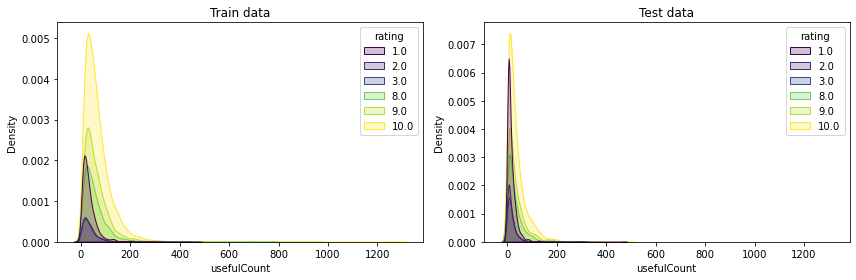

In [9]:
dtrain=pd.concat((dtrain[dtrain['rating']<=3], dtrain[dtrain['rating']>=8]))
dtest=pd.concat((dtest[dtest['rating']<=3], dtest[dtest['rating']>=8]))

fig, (ax1) = plt.subplots(1, 2, figsize=(12,4), tight_layout='tight', sharex='row')
fig7=sns.kdeplot(x=dtrain['usefulCount'], hue=dtrain['rating'], palette='viridis', multiple='layer', fill=True, ax=ax1[0])
fig8=sns.kdeplot(x=dtest['usefulCount'], hue=dtest['rating'], palette='viridis', multiple='layer', fill=True, ax=ax1[1])

ax1[0].set_title('Train data')
ax1[1].set_title('Test data')
#data selected only for lower and upper ratings

print("train data after selected on basis of ratings: \n",dtrain.describe().head(2)),
print("test data after selected on basis of ratings:\n ",dtest.describe().head(2))

In [10]:
#Add class column for supervised Ml
dtrain['classes']=pd.DataFrame(pd.cut(dtrain['rating'], bins=(1,3,10), include_lowest=True, labels=['negative','positive']))
dtest['classes']=pd.DataFrame(pd.cut(dtest['rating'], bins=(1,3,11), include_lowest=True, labels=['negative','positive']))

dtrain, dtest =dtrain.reset_index(drop=True) , dtest.reset_index(drop=True)

In [11]:
dtrain.review.describe()
dtest.review.describe()

count        11024
unique       10764
top       "Great."
freq             4
Name: review, dtype: object

# Data Cleaning

In [12]:
#remove lower case, repetive substring, numeric data, punctuation

import string
from nltk.corpus import stopwords

def clean(i):
    char_to_replace={'&#039;':"'", "&quot;":'""'}
    table = i.maketrans('', '', string.digits)
    nopun=i.lower()
    for key, value in char_to_replace.items():
        nopun=nopun.replace(key,value).translate(table)
        nopun= [char for char in nopun if char not in string.punctuation.replace("'","")]
        nopun= ''.join(nopun)
        return [str(word) for word in nopun.split() if word not in stopwords.words('english')]

#Tokenization and stopwords removal

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer= CountVectorizer(analyzer=clean)


In [14]:
bow_rev= bow_transformer.fit_transform(dtrain['review'])

In [15]:
bow_rev.shape

(34504, 33866)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer


In [17]:
rev_tfidf = TfidfTransformer().fit_transform(bow_rev)

In [18]:
rev_tfidf.shape

(34504, 33866)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rev_tfidf, dtrain["classes"], test_size=0.2)

In [19]:
X_train=rev_tfidf
y_train=dtrain['classes']

In [20]:
from sklearn.naive_bayes import MultinomialNB
senti_detect_model= MultinomialNB()
senti_detect_model.fit(X_train, y_train)

MultinomialNB()

from sklearn.pipeline import Pipeline
pipe=Pipeline([('bow', CountVectorizer(analyzer=clean)),('tfid', TfidfTransformer()),('senti_detect_model', MultinomialNB())])

In [21]:
bow_transformtest=bow_transformer.transform(dtest['review'])

In [22]:
bow_revtest=TfidfTransformer().fit_transform(bow_transformtest)

In [23]:
bow_revtest.shape

(11024, 33866)

In [24]:
all_predict=senti_detect_model.predict(bow_revtest)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_predict=lr.predict(bow_revtest)

In [27]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predict= knn.predict(bow_revtest)

In [28]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
svc_predict= svc.predict(bow_revtest)

In [30]:
print('\n classification report nb: \n', classification_report(dtest['classes'], all_predict))
print('\n classification report lr: \n', classification_report(dtest['classes'], lr_predict))
print('\n classification report knn: \n', classification_report(dtest['classes'], knn_predict))
print('\n classification report svc: \n', classification_report(dtest['classes'], svc_predict))


 classification report nb: 
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00      2951
    positive       0.73      1.00      0.85      8073

    accuracy                           0.73     11024
   macro avg       0.87      0.50      0.42     11024
weighted avg       0.80      0.73      0.62     11024


 classification report lr: 
               precision    recall  f1-score   support

    negative       0.89      0.46      0.61      2951
    positive       0.83      0.98      0.90      8073

    accuracy                           0.84     11024
   macro avg       0.86      0.72      0.75     11024
weighted avg       0.85      0.84      0.82     11024


 classification report knn: 
               precision    recall  f1-score   support

    negative       0.51      0.58      0.54      2951
    positive       0.84      0.80      0.82      8073

    accuracy                           0.74     11024
   macro avg       0.67      0.69    